# Publishing services to a federated server by reference
#### Import library and connect to the ArcGIS Enterprise

In [1]:
from arcgis.gis import GIS
gis = GIS("https://dev005219.esri.com/portal",'admin', verify_cert=False)

Enter password: ········


### Inspect the list of servers

In [ ]:
server_list = gis.admin.servers.list()
server_list

### Inspect services on the server

In [ ]:
server1 = server_list[0]

server1.services.list(folder=['Hosted'])

#### Inspect data stores on the server

In [ ]:
data_store_list = server1.datastores.list()
for data_store in data_store_list:
    print(data_store.properties.type + " | " + data_store.properties.path)

#### Register a new data store

In [ ]:
heart_health_data = server1.datastores.add_folder(name='heart_health', 
                              server_path="\\\\qalab_server\\pydata\\v106\\geosaurus\\data_prep\\SDs\\by_ref")
heart_health_data

In [ ]:
#validate data store
heart_health_data.validate()

## Publish SD file to the server

In [ ]:
server1.services.publish_sd('/Users/atma6951/Documents/GIS_data/file_formats/sd/heart_attacks_byref.sd')

### Consume the map image layer

<Item title:"heart_attacks_byref" type:Map Image Layer owner:admin>
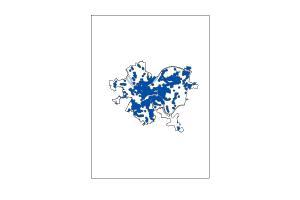

In [11]:
gis.content.search("heart attacks")[0]